In [1]:
import warnings;
warnings.filterwarnings('ignore');

from qoca import QOCA

In [2]:
# Drive gate test
circ = QOCA(num_qubits = 5, reps = 3).construct_circuit()
circ.draw()

┌───────┐┌───────┐┌────────┐┌────────┐                              »
q_0: ┤ RY(0) ├┤ RX(0) ├┤0       ├┤0       ├──■───────────────────────────»
     └───────┘└───────┘│  ZY(0) ││  ZX(0) │┌─┴─┐┌────────┐┌────────┐     »
q_1: ──────────────────┤1       ├┤1       ├┤ X ├┤0       ├┤0       ├──■──»
                       └────────┘└────────┘└───┘│  ZY(0) ││  ZX(0) │┌─┴─┐»
q_2: ───────────────────────────────────────────┤1       ├┤1       ├┤ X ├»
                                                └────────┘└────────┘└───┘»
q_3: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_4: ────────────────────────────────────────────────────────────────────»
                                                                         »
«                                                                      »
«q_0: ──────────────────────────────────────────────────────────────■──»
«                                                                 ┌─┴─┐»
«q_1: ─────────────────────────────────────────────────────────■──┤ X ├»
«     ┌────────┐┌────────┐                                   ┌─┴─┐└───┘»
«q_2: ┤0       ├┤0       ├──■─────────────────────────────■──┤ X ├─────»
«     │  ZY(0) ││  ZX(0) │┌─┴─┐┌────────┐┌────────┐     ┌─┴─┐└───┘     »
«q_3: ┤1       ├┤1       ├┤ X ├┤0       ├┤0       ├──■──┤ X ├──────────»
«     └────────┘└────────┘└───┘│  ZY(0) ││  ZX(0) │┌─┴─┐└───┘          »
«q_4: ─────────────────────────┤1       ├┤1       ├┤ X ├───────────────»
«                              └────────┘└────────┘└───┘               »
«     ┌───────┐┌───────┐┌────────┐┌────────┐                              »
«q_0: ┤ RY(0) ├┤ RX(0) ├┤0       ├┤0       ├──■───────────────────────────»
«     └───────┘└───────┘│  ZY(0) ││  ZX(0) │┌─┴─┐┌────────┐┌────────┐     »
«q_1: ──────────────────┤1       ├┤1       ├┤ X ├┤0       ├┤0       ├──■──»
«                       └────────┘└────────┘└───┘│  ZY(0) ││  ZX(0) │┌─┴─┐»
«q_2: ───────────────────────────────────────────┤1       ├┤1       ├┤ X ├»
«                                                └────────┘└────────┘└───┘»
«q_3: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_4: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«                                                                      »
«q_0: ──────────────────────────────────────────────────────────────■──»
«                                                                 ┌─┴─┐»
«q_1: ─────────────────────────────────────────────────────────■──┤ X ├»
«     ┌────────┐┌────────┐                                   ┌─┴─┐└───┘»
«q_2: ┤0       ├┤0       ├──■─────────────────────────────■──┤ X ├─────»
«     │  ZY(0) ││  ZX(0) │┌─┴─┐┌────────┐┌────────┐     ┌─┴─┐└───┘     »
«q_3: ┤1       ├┤1       ├┤ X ├┤0       ├┤0       ├──■──┤ X ├──────────»
«     └────────┘└────────┘└───┘│  ZY(0) ││  ZX(0) │┌─┴─┐└───┘          »
«q_4: ─────────────────────────┤1       ├┤1       ├┤ X ├───────────────»
«                              └────────┘└────────┘└───┘               »
«     ┌───────┐┌───────┐┌────────┐┌────────┐                              »
«q_0: ┤ RY(0) ├┤ RX(0) ├┤0       ├┤0       ├──■───────────────────────────»
«     └───────┘└───────┘│  ZY(0) ││  ZX(0) │┌─┴─┐┌────────┐┌────────┐     »
«q_1: ──────────────────┤1       ├┤1       ├┤ X ├┤0       ├┤0       ├──■──»
«                       └────────┘└────────┘└───┘│  ZY(0) ││  ZX(0) │┌─┴─┐»
«q_2: ───────────────────────────────────────────┤1       ├┤1       ├┤ X ├»
«                                                └────────┘└────────┘└───┘»
«q_3: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_4: ────────────────────────────────────────────────

In [3]:
from qiskit import BasicAer, Aer, IBMQ, QuantumRegister, QuantumCircuit
from qiskit.aqua.algorithms import VQE
from qiskit.aqua.components.optimizers import SLSQP
from qiskit.aqua.operators import Z2Symmetries

from qiskit.chemistry import FermionicOperator
from qiskit.chemistry.drivers import PySCFDriver, UnitsType
from qiskit.chemistry.components.initial_states import HartreeFock

from qiskit.providers.aer import QasmSimulator

provider = IBMQ.load_account()

import datetime
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Calculate HLi parameters in PySCF
# Modified from Qiskit textbook

def get_qubit_op(dist):
    driver = PySCFDriver(atom="Li .0 .0 .0; H .0 .0 " + str(dist), unit=UnitsType.ANGSTROM, 
                         charge=0, spin=0, basis='sto3g')
    molecule = driver.run()
    freeze_list = [0]
    remove_list = [-3, -2]
    repulsion_energy = molecule.nuclear_repulsion_energy
    num_particles = molecule.num_alpha + molecule.num_beta
    num_spin_orbitals = molecule.num_orbitals * 2
    remove_list = [x % molecule.num_orbitals for x in remove_list]
    freeze_list = [x % molecule.num_orbitals for x in freeze_list]
    remove_list = [x - len(freeze_list) for x in remove_list]
    remove_list += [x + molecule.num_orbitals - len(freeze_list)  for x in remove_list]
    freeze_list += [x + molecule.num_orbitals for x in freeze_list]
    ferOp = FermionicOperator(h1=molecule.one_body_integrals, h2=molecule.two_body_integrals)
    ferOp, energy_shift = ferOp.fermion_mode_freezing(freeze_list)
    num_spin_orbitals -= len(freeze_list)
    num_particles -= len(freeze_list)
    ferOp = ferOp.fermion_mode_elimination(remove_list)
    num_spin_orbitals -= len(remove_list)
    qubitOp = ferOp.mapping(map_type='parity', threshold=0.00000001)
    qubitOp = Z2Symmetries.two_qubit_reduction(qubitOp, num_particles)
    shift = energy_shift + repulsion_energy
    return qubitOp, num_particles, num_spin_orbitals, shift

In [5]:
# Callback function to track # evaluations

def vqe_run_callback(qubitOp, var_form, optimizers, opt, backend, shift):
    itrs = []
    vals = []
    stdevs = []
    
    def get_eval_result(num_eval, params, mean, std):
        itrs.append(num_eval)
        vals.append(mean)
        stdevs.append(std)
    
    vqe = VQE(qubitOp, var_form, optimizers[opt],callback=get_eval_result)
    vqe_result = np.real(vqe.run(backend)['eigenvalue'] + shift)
    return vqe_result, itrs, vals, stdevs

In [6]:
# Main

def vqe_test(distance, optimizers, backend):
    vqe_energies = [[] for i in range(len(optimizers))]
    vqe_result = []
    converge_itrs = [[] for i in range(len(optimizers))]
    converge_vals = [[] for i in range(len(optimizers))]
    converge_stdevs = [[] for i in range(len(optimizers))]
    
    n = 0
    ct = datetime.datetime.now()
    print("Start - ",ct)
    for opt in optimizers:
        qubitOp, num_particles, num_spin_orbitals, shift = get_qubit_op(distance)
        initial_state = HartreeFock(num_spin_orbitals, num_particles, qubit_mapping="parity")
        var_form = QOCA(num_qubits = num_spin_orbitals - 2, reps = 1, initial_state = initial_state)
        print(qubitOp, ", num particles:", num_particles, ", num orbitals:", num_spin_orbitals, ", shift:", shift)
            
        vqe_result, converge_itrs[n], converge_vals[n], converge_stdevs[n] = vqe_run_callback(qubitOp, var_form, optimizers, opt, backend, shift)
        vqe_energies[n].append(vqe_result)

        n += 1
        ct = datetime.datetime.now()
        print(opt,"Finish - ",ct)

    print("VQE Complete")
    return vqe_energies, converge_itrs, converge_vals, converge_stdevs

In [7]:
backend = BasicAer.get_backend("qasm_simulator")
ds = 1.6
os = {"SLSQP":SLSQP(maxiter=5)}

vqe_energies, converge_itrs, converge_vals, converge_stdevs = vqe_test(distance = ds, optimizers = os, backend = backend)

Start -  2021-03-17 13:11:23.281668
Representation: paulis, qubits: 4, size: 100 , num particles: 2 , num orbitals: 6 , shift: -6.8040122982962234
SLSQP Finish -  2021-03-17 13:11:41.959930
VQE Complete


In [8]:
def plot_iterations(opt_labels, converge_itrs, converge_vals):
    """ Generates energy convergence plot for each optimizer

        ARGS:
            opt_labels (String[]): names of trials to generate legend
            converge_itrs
            converge_vals

        Returns: N/A

    """
    for i in range(len(opt_labels)):
        plt.plot(converge_itrs[i], converge_vals[i], label="VQE Energy - %s" % (opt_labels[i]))
    plt.xlabel('Eval Count')
    plt.ylabel('Energy')
    plt.title('VQE Convergence')
    plt.legend()
    plt.show()

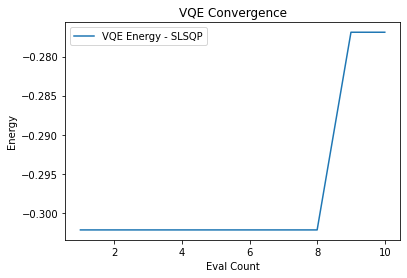

In [9]:
plot_iterations(opt_labels = ["SLSQP"], converge_itrs = converge_itrs, converge_vals = converge_vals)